In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
fpaths = "../testes_seq_paral/test_greff_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
speedups = []

In [32]:
sequenciais = []

for i in sizes:
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        print(i)
        for linha in arquivo:
            if "Tempo sequencial" in linha:
                aux = linha.split(":")
                aux = aux[1].split("sec")
                aux = aux[0]
                print(float(aux))
                sequencial_local.append(float(aux))
    print(len(sequencial_local))
    sequenciais.append(np.mean(sequencial_local))

small
6.72698
1
medium
54.381045
1
large
439.557751
1


In [34]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo paralelo" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_pthread.append(np.mean(paralelo_local))

pthreads - small threads 2
3.57885
1
pthreads - small threads 4
1.856374
1
pthreads - small threads 8
2.091502
1
pthreads - small threads 16
2.031968
1
pthreads - medium threads 2
28.902502
1
pthreads - medium threads 4
15.341319
1
pthreads - medium threads 8
17.145561
1
pthreads - medium threads 16
16.260198
1
pthreads - large threads 2
227.966443
1
pthreads - large threads 4
129.214294
1
pthreads - large threads 8
137.857224
1
pthreads - large threads 16
131.06301
1


In [35]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo mpi" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_mpi.append(np.mean(paralelo_local))

mpi - small threads 2
3.645191
1
mpi - small threads 4
1.974544
1
mpi - small threads 8
1.320747
1
mpi - small threads 16
2.245927
1
mpi - medium threads 2
28.929755
1
mpi - medium threads 4
15.591898
1
mpi - medium threads 8
17.32824
1
mpi - medium threads 16
17.637381
1
mpi - large threads 2
238.744707
1
mpi - large threads 4
133.183132
1
mpi - large threads 8
137.494144
1
mpi - large threads 16
141.247278
1


In [36]:
sequenciais

[6.72698, 54.381045, 439.557751]

In [37]:
paralelos_pthread

[3.57885,
 1.856374,
 2.091502,
 2.031968,
 28.902502,
 15.341319,
 17.145561,
 16.260198,
 227.966443,
 129.214294,
 137.857224,
 131.06301]

In [38]:
paralelos_mpi

[3.645191,
 1.974544,
 1.320747,
 2.245927,
 28.929755,
 15.591898,
 17.32824,
 17.637381,
 238.744707,
 133.183132,
 137.494144,
 141.247278]

In [39]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

In [40]:
speedups_pthreads

[[1.8796484904368722,
  3.623720220171151,
  3.2163392624056777,
  3.3105737885635995],
 [1.881534166142433,
  3.544743773335265,
  3.1717273643014656,
  3.3444269866824503],
 [1.92816866033217, 3.401773421445154, 3.1884999439710175, 3.3537895322257594]]

In [41]:
speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

In [42]:
speedups_mpi

[[1.8454396491157803,
  3.4068524175708417,
  5.093314616652546,
  2.9951908499252204],
 [1.879761684812056, 3.487775830755178, 3.138290155261007, 3.083283453478722],
 [1.841120402304877, 3.300401067306331, 3.19691979754425, 3.111973251619051]]

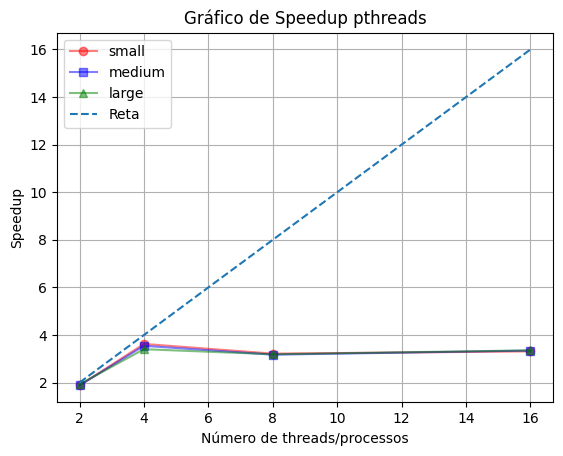

In [43]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

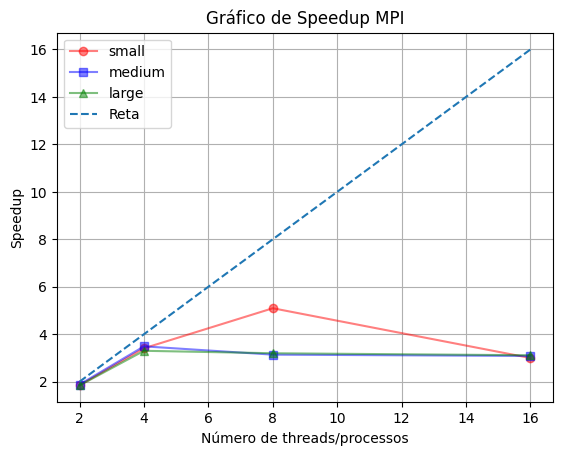

In [44]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()